Just some imports to get out of the way

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
#from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime

%matplotlib inline

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Working with tensors

In [ ]:
n, k = 5, 5

In [ ]:
x = torch.tensor([i for i in range(25)])
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])

In [ ]:
# We can manipulate the shape of our data, adding and subtract dimensions.
x = x.reshape(5, 5)
x

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
c = x.cuda()
print(c)
print(c[2][2])


tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]], device='cuda:0')
tensor(12, device='cuda:0')


In [ ]:
c = c.cpu()
print(c)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])


In [ ]:
x = x.reshape(5, -1)
x

In [ ]:
x = x.unsqueeze(2)
x

tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9]],

        [[10],
         [11],
         [12],
         [13],
         [14]],

        [[15],
         [16],
         [17],
         [18],
         [19]],

        [[20],
         [21],
         [22],
         [23],
         [24]]])

In [ ]:
x = x.squeeze()
x

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
# Some useful short hands
I = torch.eye(5)
zeros = torch.zeros((n, k))
ones = torch.ones((n, k))
sevens = ones * 7

print(I, '\n')
print(zeros, '\n')
print(ones,'\n')
print(sevens,'\n')

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]) 

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

tensor([[7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.]]) 



In [ ]:
x.type(torch.float)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

## How about some math

In [ ]:
x

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [ ]:
x ** 2

tensor([[  0,   1,   4,   9,  16],
        [ 25,  36,  49,  64,  81],
        [100, 121, 144, 169, 196],
        [225, 256, 289, 324, 361],
        [400, 441, 484, 529, 576]])

In [ ]:
x + 10

tensor([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34]])

In [ ]:
1 / (x + 1)

tensor([[1.0000, 0.5000, 0.3333, 0.2500, 0.2000],
        [0.1667, 0.1429, 0.1250, 0.1111, 0.1000],
        [0.0909, 0.0833, 0.0769, 0.0714, 0.0667],
        [0.0625, 0.0588, 0.0556, 0.0526, 0.0500],
        [0.0476, 0.0455, 0.0435, 0.0417, 0.0400]])

In [ ]:
print(x)
x + torch.tensor([1, 2, 3, 4, 5])

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])


tensor([[ 1,  3,  5,  7,  9],
        [ 6,  8, 10, 12, 14],
        [11, 13, 15, 17, 19],
        [16, 18, 20, 22, 24],
        [21, 23, 25, 27, 29]])

In [ ]:
y = torch.rand(5, 5) * 25
y

tensor([[ 9.8814,  3.4530, 13.6476, 11.3275, 16.3123],
        [ 4.8228,  0.8957, 11.2766, 17.3057, 24.3833],
        [20.6730,  4.8681, 13.0571, 19.4952, 22.2042],
        [22.6135, 16.1096, 17.1943, 13.4908, 16.4697],
        [ 2.3119,  7.1942, 20.6660,  5.1395,  9.0108]])

In [ ]:
x * y

tensor([[  0.0000,   3.4530,  27.2953,  33.9824,  65.2491],
        [ 24.1141,   5.3744,  78.9363, 138.4459, 219.4493],
        [206.7299,  53.5489, 156.6852, 253.4381, 310.8582],
        [339.2029, 257.7534, 292.3023, 242.8345, 312.9234],
        [ 46.2384, 151.0779, 454.6512, 118.2083, 216.2596]])

In [ ]:
a = torch.rand(3,2)
b = torch.rand(2,1)
c = torch.matmul(a,b)
print('a:',a)
print('b:',b)
print('c:',c)

a: tensor([[0.0839, 0.1867],
        [0.7224, 0.4664],
        [0.7655, 0.7425]])
b: tensor([[0.7038],
        [0.1959]])
c: tensor([[0.0956],
        [0.5998],
        [0.6842]])


In [ ]:
x.T

tensor([[ 0,  5, 10, 15, 20],
        [ 1,  6, 11, 16, 21],
        [ 2,  7, 12, 17, 22],
        [ 3,  8, 13, 18, 23],
        [ 4,  9, 14, 19, 24]])

## Lets work with some data

In [ ]:
traindf = pd.read_csv('sample_data/california_housing_train.csv')
testdf = pd.read_csv('sample_data/california_housing_test.csv')

print(traindf[:5])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


In [ ]:
traindf.iloc[0]

longitude              -114.3100
latitude                 34.1900
housing_median_age       15.0000
total_rooms            5612.0000
total_bedrooms         1283.0000
population             1015.0000
households              472.0000
median_income             1.4936
median_house_value    66900.0000
Name: 0, dtype: float64

In [ ]:
sc = MinMaxScaler()
train_numpy  = sc.fit_transform(traindf.values)
test_numpy = sc.transform(testdf.values)

In [ ]:
train_numpy[:5]

array([[1.        , 0.17534538, 0.2745098 , 0.14788454, 0.19894475,
        0.02836402, 0.07745437, 0.06853009, 0.10701193],
       [0.98406375, 0.19766206, 0.35294118, 0.20160801, 0.29484792,
        0.03155918, 0.07597435, 0.09104012, 0.13422831],
       [0.9750996 , 0.12221041, 0.31372549, 0.01892711, 0.02684668,
        0.00924914, 0.01907581, 0.07937822, 0.14577466],
       [0.97410359, 0.11689692, 0.25490196, 0.03951496, 0.05214153,
        0.01435018, 0.03700049, 0.18563882, 0.12041394],
       [0.97410359, 0.10945802, 0.37254902, 0.038276  , 0.05043451,
        0.0174052 , 0.04292057, 0.0982814 , 0.10412534]])

In [ ]:
train_tensor = torch.tensor(train_numpy)
print(train_tensor[:5])

tensor([[1.0000, 0.1753, 0.2745, 0.1479, 0.1989, 0.0284, 0.0775, 0.0685, 0.1070],
        [0.9841, 0.1977, 0.3529, 0.2016, 0.2948, 0.0316, 0.0760, 0.0910, 0.1342],
        [0.9751, 0.1222, 0.3137, 0.0189, 0.0268, 0.0092, 0.0191, 0.0794, 0.1458],
        [0.9741, 0.1169, 0.2549, 0.0395, 0.0521, 0.0144, 0.0370, 0.1856, 0.1204],
        [0.9741, 0.1095, 0.3725, 0.0383, 0.0504, 0.0174, 0.0429, 0.0983, 0.1041]],
       dtype=torch.float64)


In [ ]:
class CustomHousingDataset(torch.utils.data.Dataset):
  def __init__(self, file, scaler):
    self.df = pd.read_csv(file)
    self.sc = scaler

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self, idx):
    raw = self.df.iloc[idx].values
    if type(idx) == int:
      raw = raw.reshape(1, -1)
    raw = self.sc.transform(raw)
    data = torch.tensor(raw[:, :-1], dtype=torch.float32)
    label = torch.tensor(raw[:, -1], dtype=torch.float32)
    return data, label

In [ ]:
train_data = CustomHousingDataset('sample_data/california_housing_train.csv', sc)
test_data = CustomHousingDataset('sample_data/california_housing_test.csv', sc)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
train_data[100:110]

(tensor([[0.8725, 0.0266, 0.1373, 0.0575, 0.0475, 0.0279, 0.0470, 0.4056],
         [0.8725, 0.0159, 0.5686, 0.0246, 0.0273, 0.0181, 0.0242, 0.1432],
         [0.8715, 0.0701, 0.7059, 0.0186, 0.0289, 0.0108, 0.0232, 0.1346],
         [0.8715, 0.0351, 0.0392, 0.0429, 0.0490, 0.0281, 0.0511, 0.2503],
         [0.8695, 0.0531, 0.3725, 0.0295, 0.0377, 0.0214, 0.0377, 0.1239],
         [0.8695, 0.0531, 0.3137, 0.0265, 0.0357, 0.0208, 0.0355, 0.1066],
         [0.8675, 0.0276, 0.4314, 0.0323, 0.0363, 0.0159, 0.0385, 0.1839],
         [0.8625, 0.0266, 0.3333, 0.0412, 0.0526, 0.0325, 0.0562, 0.1158],
         [0.8596, 0.0223, 0.2941, 0.0091, 0.0152, 0.0034, 0.0087, 0.1099],
         [0.8586, 0.0871, 0.3529, 0.0197, 0.0368, 0.0133, 0.0276, 0.0878]]),
 tensor([0.2988, 0.1637, 0.1186, 0.1406, 0.0969, 0.0953, 0.2268, 0.0829, 0.1495,
         0.0722]))

## LETS MODEL
We'll start by defining some basic models, loss functions, and optimizers. These are the fundamental building blocks for any Deep Learning platform.

Some common loss functions:
  - CrossEntropy
  - BCE (binary cross entropy)
  - L1
  - MSE (mean sqaure error aka L2)

And for optimizers we use some form of gradient descent:
- SGD (stochastic gradient decent)
- RMSprop
- Adagrad
- Adam

Once we get here, would could also do things like schedule the learning rate, etc.

In [ ]:
class FeedForward(nn.Module):
  def __init__(self):
    super(FeedForward, self).__init__()
    self.linear1 = nn.Linear(8, 32)
    self.relu1 = nn.LeakyReLU()
    self.linear2 = nn.Linear(32, 16)
    self.relu2 = nn.LeakyReLU()
    self.linear_out = nn.Linear(16, 1)

  def forward(self, x):
    x = self.linear1(x)
    x = self.relu1(x)
    x = self.linear2(x)
    x = self.relu2(x)
    x = self.linear_out(x)
    return x


In [ ]:
ff = FeedForward()
print(ff)

FeedForward(
  (linear1): Linear(in_features=8, out_features=32, bias=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (linear2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (linear_out): Linear(in_features=16, out_features=1, bias=True)
)


In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(ff.parameters(), lr=1e-2)
ff.eval()
a, b = train_data[0]
with torch.no_grad():
  pred = ff(a)
print('a:',a)
print('b:',b)
print('prediction:', pred)
print('target:', b)
print('error:', loss_func(pred, b.unsqueeze(0)))

a: tensor([[1.0000, 0.1753, 0.2745, 0.1479, 0.1989, 0.0284, 0.0775, 0.0685]])
b: tensor([0.1070])
prediction: tensor([[-0.0775]])
target: tensor([0.1070])
error: tensor(0.0341)


### This is what we want to do, over the entire training data.

In [ ]:
def train(dataloader, model, loss_func, optimizer):
  model.train()
  train_loss = []

  now = datetime.datetime.now()
  for batch, (X, y) in enumerate(dataloader):
    # ignore the first time we see this
    # second time why is gpu better than cpu for this?
    X, y = X.to(device), y.to(device)

    # make some predictions and get the error
    pred = model(X)
    loss = loss_func(pred, y.unsqueeze(1))

    # where the magic happens
    # backpropogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 10 == 0:
      loss, current = loss.item(), batch * len(X)
      iters = 10 * len(X)
      then = datetime.datetime.now()
      iters /= (then - now).total_seconds()
      print(f"loss: {loss:>6f} [{current:>5d}/{17000}] ({iters:.1f} its/sec)")
      now = then
      train_loss.append(loss)
  return train_loss

In [ ]:
def test(dataloader, model, loss_func):
  size = len(dataloader)
  num_batches = 0
  model.eval()
  test_loss = 0

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_func(pred, y.unsqueeze(1)).item()
      num_batches = num_batches + 1
  test_loss /= num_batches
  print(f"Avg Loss: {test_loss:>8f}\n")
  return test_loss

In [ ]:
ff = FeedForward().to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(ff.parameters(), lr=1e-3)
epochs = 10
train_loss = []
test_loss = []
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------------- \n")
  losses = train(train_loader, ff, loss_func, optimizer)
  train_loss.append(losses)
  test_loss.append(test(test_loader, ff, loss_func))

# Could add a condition that interrupts training when the loss doesn't change much
print('Done!')

Epoch 1
------------------------------- 

loss: 0.119961 [    0/17000] (22001.4 its/sec)
loss: 0.083868 [  640/17000] (2191.3 its/sec)
loss: 0.060899 [ 1280/17000] (2194.6 its/sec)
loss: 0.053186 [ 1920/17000] (2694.4 its/sec)
loss: 0.047891 [ 2560/17000] (1643.4 its/sec)
loss: 0.042635 [ 3200/17000] (1954.5 its/sec)
loss: 0.057978 [ 3840/17000] (1231.3 its/sec)
loss: 0.042396 [ 4480/17000] (1921.6 its/sec)
loss: 0.039423 [ 5120/17000] (2047.7 its/sec)
loss: 0.055261 [ 5760/17000] (2227.6 its/sec)
loss: 0.037536 [ 6400/17000] (1971.0 its/sec)
loss: 0.026084 [ 7040/17000] (1758.0 its/sec)
loss: 0.023183 [ 7680/17000] (2034.5 its/sec)
loss: 0.025530 [ 8320/17000] (1255.3 its/sec)
loss: 0.024527 [ 8960/17000] (975.7 its/sec)
loss: 0.021200 [ 9600/17000] (787.9 its/sec)
loss: 0.030947 [10240/17000] (735.8 its/sec)
loss: 0.026996 [10880/17000] (1255.7 its/sec)
loss: 0.020426 [11520/17000] (1541.6 its/sec)
loss: 0.016977 [12160/17000] (1687.8 its/sec)
loss: 0.025383 [12800/17000] (2451.7 its

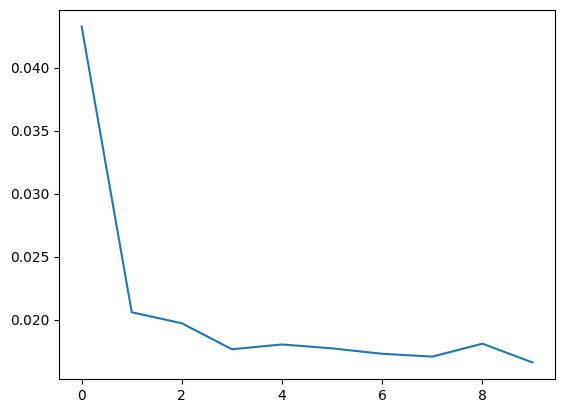

In [ ]:
plt.plot([i for i in range(len(train_loss))], torch.tensor(train_loss).mean(axis=1))

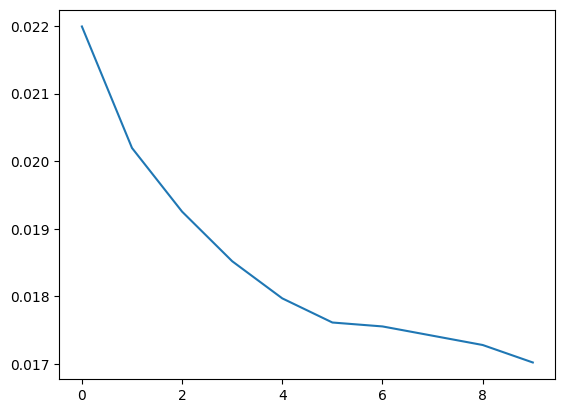

In [ ]:
plt.plot([i for i in range(len(test_loss))], test_loss)

In [ ]:
ff.eval()
with torch.no_grad():
  x, y = train_data[4]
  x = x.to(device)
  y = y.to(device)

  pred = ff(x)
  print(pred)
  print(y)
print(loss_func(pred, y.unsqueeze(1)).item())

tensor([[0.0137]], device='cuda:0')
tensor([0.1041], device='cuda:0')
0.008179862052202225
